In [2]:
import pandas as pd
%pylab inline
rcParams['figure.figsize'] = 9, 7

Populating the interactive namespace from numpy and matplotlib


In [3]:
result_df =  pd.read_csv("results/sams_vars.csv")

In [4]:
result_df[0:1]

,nsamples,nvars,mtry,ntrees,ncores,count,oob,duration
0,10000,10000000,0.25,100,128,0,0.1823,2067.658


In [5]:
result_df['trees_by_hour'] = 3600*100.0/result_df['duration']

In [6]:
oob_and_duration_nested = result_df.groupby(['nsamples', 'nvars']).mean()[['duration', 'trees_by_hour','oob']]
oob_and_duration_nested

duration  trees_by_hour     oob
nsamples nvars                                     
1000     150000      21.5940   16679.055615  0.2450
         500000      26.7194   13481.611231  0.2560
         2500000     59.7702    6129.166336  0.2840
         10000000   133.4944    2745.907871  0.3150
         50000000   668.8212     538.344520  0.3090
5000     150000      45.6680    7899.616537  0.1880
         500000      71.8562    5075.196489  0.1882
         2500000    186.1984    1970.837143  0.2056
         10000000   729.3314     493.806307  0.2062
         50000000  2887.3548     124.783144  0.2120
10000    150000      70.1818    5140.164932  0.1783
         500000     120.1606    2996.728459  0.1795
         2500000    397.3036     922.587574  0.1818
         10000000  2237.8492     161.318649  0.1823
         50000000  5784.7438      62.245897  0.1924

In [7]:
g = result_df.groupby(['nsamples', 'nvars'])
g.std()[['duration', 'trees_by_hour','oob']]

duration  trees_by_hour  oob
nsamples nvars                                   
1000     150000      0.523603     400.040789  0.0
         500000      0.734549     375.412879  0.0
         2500000     9.597924     827.513508  0.0
         10000000   20.432902     401.823236  0.0
         50000000    9.342373       7.523709  0.0
5000     150000      2.352945     403.883552  0.0
         500000      9.901455     591.490790  0.0
         2500000    27.885173     312.328004  0.0
         10000000   16.546672      11.216870  0.0
         50000000   91.911200       3.988094  0.0
10000    150000      3.680163     253.454160  0.0
         500000      2.115481      52.410027  0.0
         2500000    53.780561     152.215304  0.0
         10000000  132.011462       9.542620  0.0
         50000000   94.333454       1.014619  0.0

In [8]:
oob_and_duration = oob_and_duration_nested.unstack()
oob_and_duration

duration                                           trees_by_hour  \
nvars    150000    500000    2500000    10000000   50000000      150000     
nsamples                                                                    
1000      21.5940   26.7194   59.7702   133.4944   668.8212  16679.055615   
5000      45.6680   71.8562  186.1984   729.3314  2887.3548   7899.616537   
10000     70.1818  120.1606  397.3036  2237.8492  5784.7438   5140.164932   

                                                                  oob  \
nvars         500000       2500000      10000000    50000000 150000     
nsamples                                                                
1000      13481.611231  6129.166336  2745.907871  538.344520   0.2450   
5000       5075.196489  1970.837143   493.806307  124.783144   0.1880   
10000      2996.728459   922.587574   161.318649   62.245897   0.1783   

                                              
nvars    500000   2500000  10000000 50000000  
nsamples                                      
1000       0.2560   0.2840   0.3150   0.3090  
5000       0.1882   0.2056   0.2062   0.2120  
10000      0.1795   0.1818   0.1823   0.1924

In [9]:
duration = oob_and_duration['trees_by_hour']
duration.round(1)

nvars,150000,500000,2500000,10000000,50000000
nsamples,,,,,
1000,16679.1,13481.6,6129.2,2745.9,538.3
5000,7899.6,5075.2,1970.8,493.8,124.8
10000,5140.2,2996.7,922.6,161.3,62.2


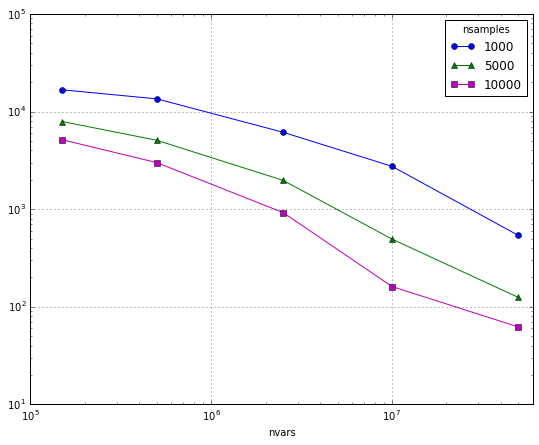

In [18]:
duration.T.plot(style=['bo-', 'g^-', 'ms-'], logx=True, logy=True, grid=True, xlim = (100000, 60000000))

In [27]:
trees_by_hour = oob_and_duration['trees_by_hour']
trees_by_hour

nvars,150000,500000,2500000,10000000,50000000
nsamples,,,,,
1000,16679.055615,13481.611231,6129.166336,2745.907871,538.344520
5000,7899.616537,5075.196489,1970.837143,493.806307,124.783144
10000,5140.164932,2996.728459,922.587574,161.318649,62.245897


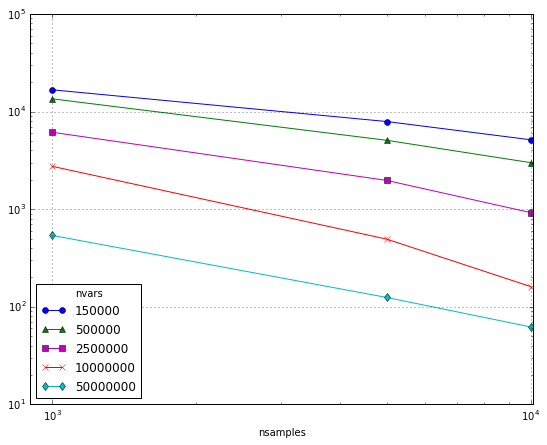

In [31]:
trees_by_hour.plot(style=['bo-', 'g^-', 'ms-', 'rx-', 'cd-'], logy=True, logx=True, grid=True, xlim=(900, 10100))

In [13]:
oob = oob_and_duration['oob']
oob.round(3)

nvars,150000,500000,2500000,10000000,50000000
nsamples,,,,,
1000,0.245,0.256,0.284,0.315,0.309
5000,0.188,0.188,0.206,0.206,0.212
10000,0.178,0.180,0.182,0.182,0.192


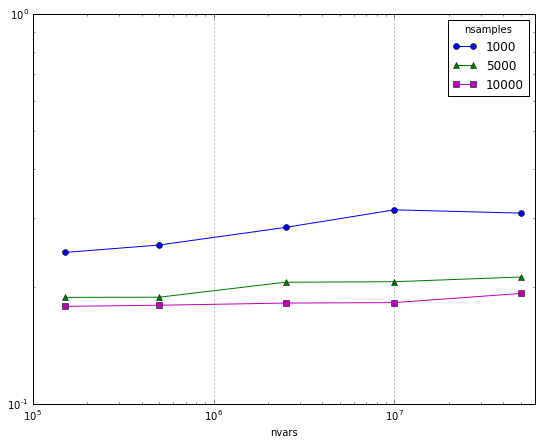

In [14]:
oob.T.plot(style=['bo-', 'g^-', 'ms-'], logx=True, logy=True, grid=True, xlim = (100000, 60000000))